<a href="https://colab.research.google.com/github/harpreet-kaur87/Machine_Learning/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:

In the field of banking, accurately predicting and approving loan applications is important for risk management and financial stability. A robust machine learning model for loan approval ensures efficient decision-making, mitigates potential losses, and fosters responsible lending practices, contributing to a healthier financial ecosystem for both the bank and its clients.

Problem:  The traditional loan approval process in the banking sector is often time-consuming and subjective. This project aims to develop a machine learning system that analyzes loan applications and predicts approval rates, facilitating faster and more data-driven decisions for loan officers.

Dataset : https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [97]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [98]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [99]:
#shape of dataframe
df.shape

(4269, 13)

In [100]:
# first five observations
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [101]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [102]:
df.columns = df.columns.str.replace(' ','')

In [103]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [104]:
# statistical summary of data
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [105]:
#null values in dataframe
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [106]:
# distribution of target feature
df.loan_status.value_counts()

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

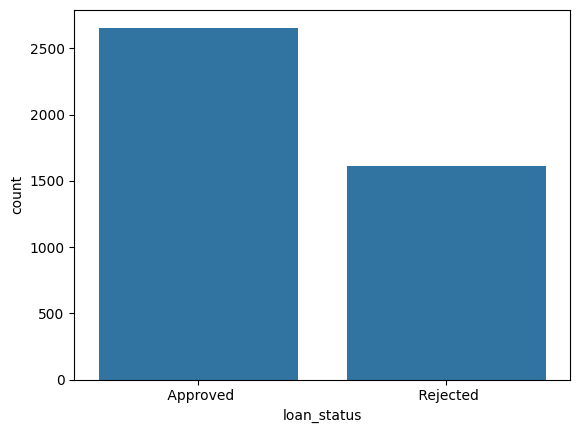

In [107]:
#distribution of target variable
sns.countplot(df, x='loan_status')

<Axes: xlabel='education', ylabel='count'>

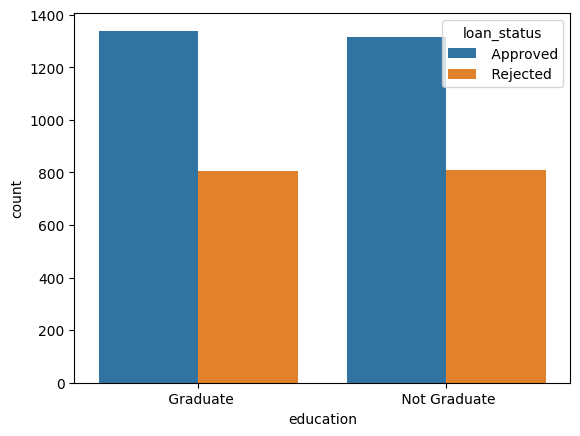

In [108]:
sns.countplot(df, x='education', hue='loan_status')

<Axes: xlabel='no_of_dependents', ylabel='count'>

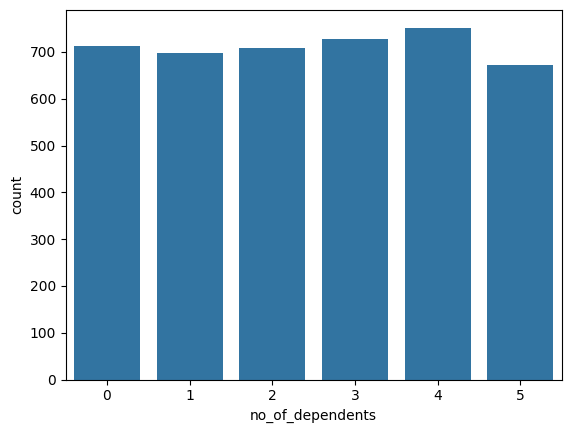

In [109]:
sns.countplot(df,x='no_of_dependents')

<Axes: xlabel='self_employed', ylabel='count'>

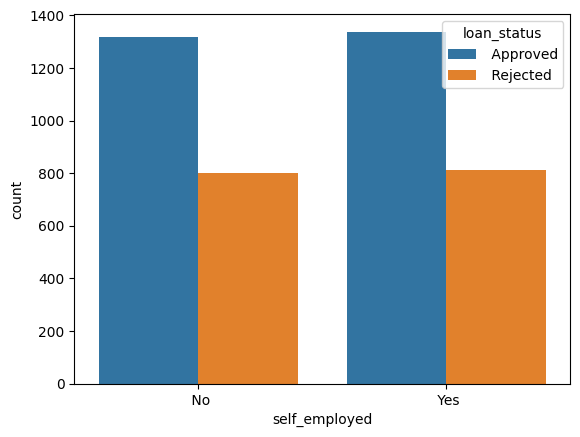

In [110]:
sns.countplot(df, x='self_employed', hue='loan_status')

<Axes: xlabel='loan_term', ylabel='count'>

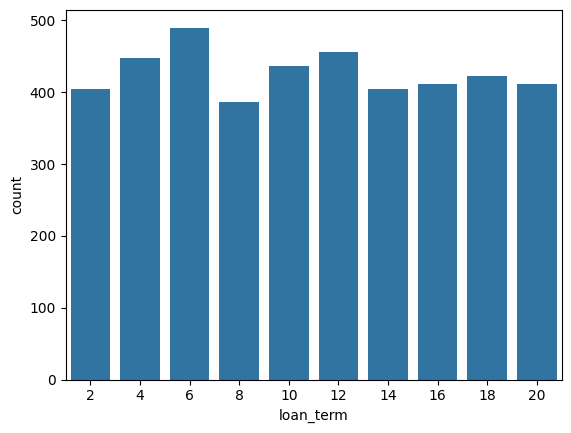

In [111]:
# The graph shows that the most popular loan_term, with the highest number of applications, is 6 years.
sns.countplot(df, x='loan_term')

#Handling Anomalies

<Axes: ylabel='residential_assets_value'>

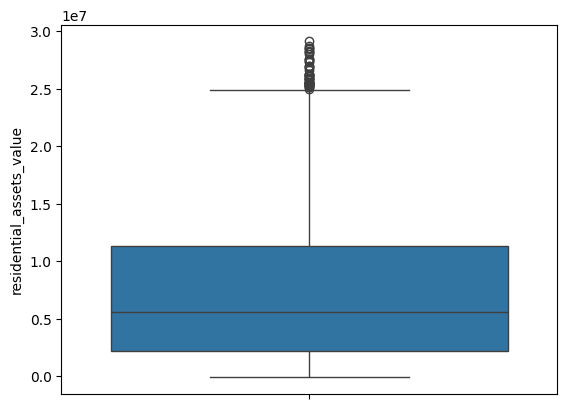

In [112]:
sns.boxplot(df['residential_assets_value'])

<Axes: ylabel='commercial_assets_value'>

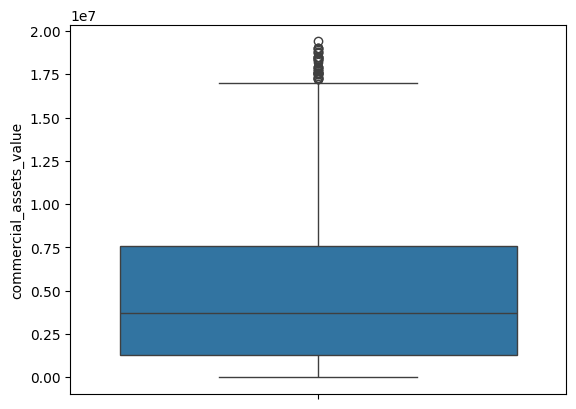

In [113]:
sns.boxplot(df['commercial_assets_value'])

<Axes: ylabel='bank_asset_value'>

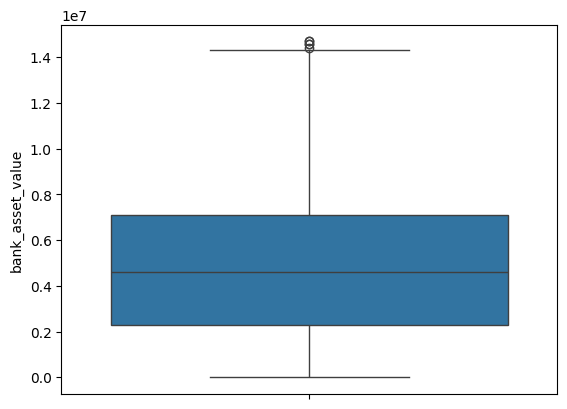

In [114]:
sns.boxplot(df['bank_asset_value'])

In [115]:
# removing outlier with iqr method

column = ['residential_assets_value','commercial_assets_value','bank_asset_value']

def remove_outlier(df,column):

  for col in column:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

In [116]:
df = remove_outlier(df,column)

In [117]:
# length of dataframe after removing outliers
len(df)

4173

<Axes: >

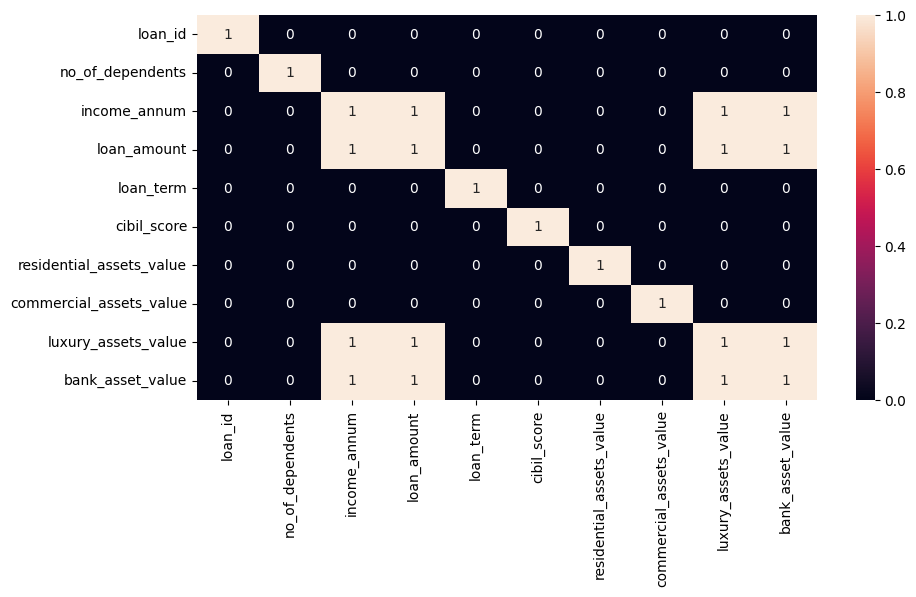

In [118]:
#heatmap displaying correlation among various features
plt.figure(figsize=(10,5))
sns.heatmap(df.corr() > 0.7, annot=True)

In [119]:
#Analysis reveals high correlation (>70%) among income, loan amount, luxury asset value, and bank assets.

#Machine Learning Model

In [120]:
#converting categorical features into numerical

import re
df['loan_status'] = df['loan_status'].str.replace(r"\s+", " ").str.strip()

In [121]:
df['loan_status'] = df['loan_status'].replace({'Approved': 1,'Rejected': 0})

In [122]:
df['education'] = df['education'].str.replace(' ','')

In [123]:
df['education'] = df['education'].replace({'Graduate': 1,'NotGraduate': 0})

In [124]:
df['self_employed'] = df['self_employed'].str.replace(' ','')

In [125]:
df['self_employed'] = df['self_employed'].replace({'Yes':1,'No':0})

In [126]:
#train test split
x = df[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y = df['loan_status']

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [128]:
x.shape, x_train.shape, x_test.shape

((4173, 11), (3338, 11), (835, 11))

In [129]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [130]:
#Model Training
lr =  LogisticRegression()
rfc =  RandomForestClassifier()
dt =  DecisionTreeClassifier()
gbc =  GradientBoostingClassifier()
sv = SVC()


for model in (lr,rfc,dt,gbc,sv):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy_on_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} --> {accuracy_on_test_data}')
  print()
  print(classification_report(y_test,y_pred))
  print()
  print(confusion_matrix(y_test,y_pred))
  print('-'*80)

LogisticRegression() --> 0.9065868263473054

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       337
           1       0.91      0.93      0.92       498

    accuracy                           0.91       835
   macro avg       0.90      0.90      0.90       835
weighted avg       0.91      0.91      0.91       835


[[293  44]
 [ 34 464]]
--------------------------------------------------------------------------------
RandomForestClassifier() --> 0.9784431137724551

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       337
           1       0.97      1.00      0.98       498

    accuracy                           0.98       835
   macro avg       0.98      0.97      0.98       835
weighted avg       0.98      0.98      0.98       835


[[321  16]
 [  2 496]]
--------------------------------------------------------------------------------
DecisionTreeClassifier() --> 0.97245508982

In [131]:
# feature importance with random forest

rfc.fit(x_train,y_train)

importance_rfc = rfc.feature_importances_

feature_names = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


for feature,importance in zip(feature_names,importance_rfc):
  print(f'{feature}:---> {importance}')

loan_id:---> 0.008005182794517516
no_of_dependents:---> 0.0026412469727438445
education:---> 0.0026422493356944815
self_employed:---> 0.018598618060732482
income_annum:---> 0.027736945426697125
loan_amount:---> 0.06305981705001809
loan_term:---> 0.8116403268388294
cibil_score:---> 0.016915829151868834
residential_assets_value:---> 0.015592598914348959
commercial_assets_value:---> 0.018056740930598073
luxury_assets_value:---> 0.015110444523951248


Text(0.5, 1.0, 'Feature Importance - Random Forest Classifier')

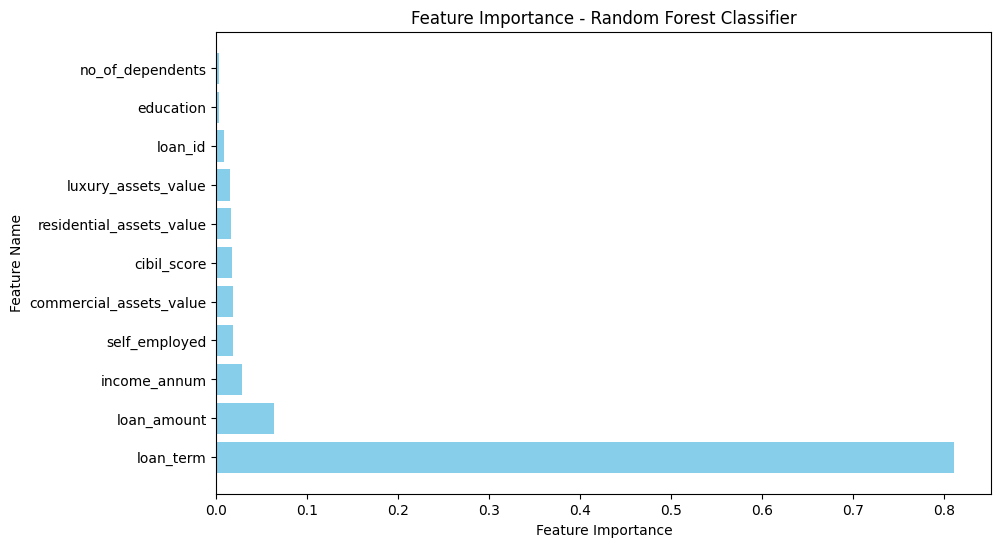

In [132]:
sorted_idx = importance_rfc.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importance_rfc[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Random Forest Classifier")

In [133]:
rfc.fit(x_train,y_train)
y_prd = rfc.predict(x_test)
accuracy_with_rfc = accuracy_score(y_test,y_prd)
print(f'{rfc} ---> {accuracy_with_rfc}')
print(confusion_matrix(y_test,y_prd))

RandomForestClassifier() ---> 0.9808383233532935
[[322  15]
 [  1 497]]


In [134]:
# feature importance with decision tree

dt.fit(x_train,y_train)

importance_dt = dt.feature_importances_

feature_names = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


for feature,importance in zip(feature_names,importance_dt):
  print(f'{feature}:---> {importance}')

loan_id:---> 0.002835305778030863
no_of_dependents:---> 0.0008562475093983936
education:---> 0.00042812375469919683
self_employed:---> 0.020584032027286214
income_annum:---> 0.03602243538610752
loan_amount:---> 0.08599122069665291
loan_term:---> 0.8225319885818804
cibil_score:---> 0.003757018619655854
residential_assets_value:---> 0.005062804674773548
commercial_assets_value:---> 0.01192265938232724
luxury_assets_value:---> 0.010008163589187926


Text(0.5, 1.0, 'Feature Importance - Extra Trees Classifier')

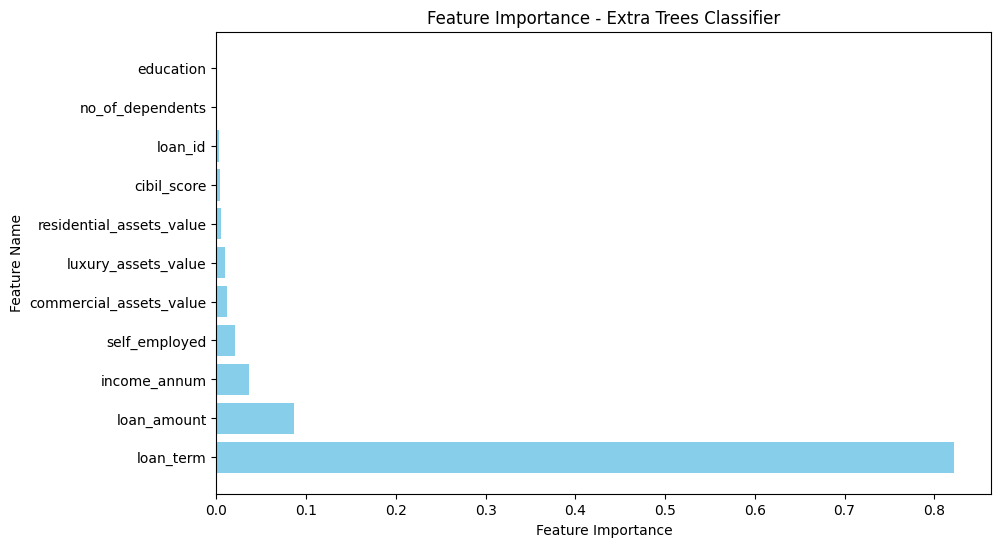

In [135]:
sorted_idx = importance_dt.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importance_dt[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Extra Trees Classifier")

In [136]:
dt.fit(x_train,y_train)
y_prd = dt.predict(x_test)
accuracy_with_dt = accuracy_score(y_test,y_prd)
print(f'{dt} ---> {accuracy_with_dt}')
print(confusion_matrix(y_test,y_prd))

DecisionTreeClassifier() ---> 0.9712574850299401
[[320  17]
 [  7 491]]


In [137]:
# feature importance with gradient boosting classifier

gbc.fit(x_train,y_train)

importance_gbc = gbc.feature_importances_

feature_names = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']


for feature,importance in zip(feature_names,importance_gbc):
  print(f'{feature}:---> {importance}')

loan_id:---> 0.0009058039954685867
no_of_dependents:---> 0.0
education:---> 9.610771660327218e-05
self_employed:---> 0.009699139735944697
income_annum:---> 0.019662120033434993
loan_amount:---> 0.09742201642810132
loan_term:---> 0.8648552377476846
cibil_score:---> 0.0021831914273318922
residential_assets_value:---> 0.00136339378266462
commercial_assets_value:---> 0.0013087174154120121
luxury_assets_value:---> 0.002504271717353972


Text(0.5, 1.0, 'Feature Importance - Gradient Boosting Classifier')

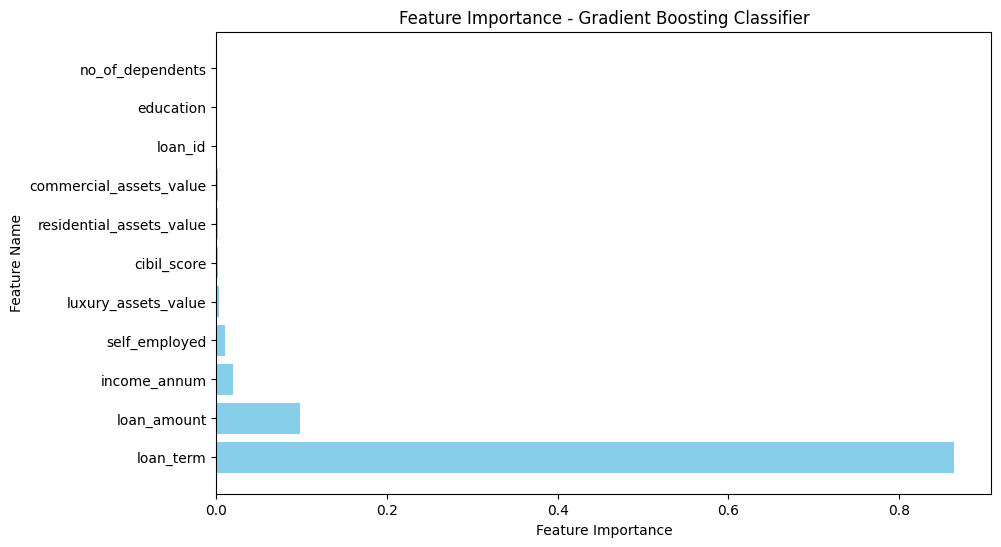

In [138]:
sorted_idx = importance_gbc.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importance_gbc[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Gradient Boosting Classifier")

###Model Building after dropping the highly correlated features

In [139]:
# train test split

x = df[['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       ]]
y = df['loan_status']

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [141]:
x.shape, x_train.shape, x_test.shape

((4173, 8), (3338, 8), (835, 8))

In [142]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [143]:
#model training
for model in (lr,rfc,dt,gbc,sv):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy_on_test_data = accuracy_score(y_test,y_pred)
  print(f'{model} --> {accuracy_on_test_data}')
  print()
  print(classification_report(y_test,y_pred))
  print()
  print(confusion_matrix(y_test,y_pred))
  print('*'*80)

LogisticRegression() --> 0.9161676646706587

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       326
           1       0.93      0.94      0.93       509

    accuracy                           0.92       835
   macro avg       0.91      0.91      0.91       835
weighted avg       0.92      0.92      0.92       835


[[289  37]
 [ 33 476]]
********************************************************************************
RandomForestClassifier() --> 0.9664670658682635

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       326
           1       0.98      0.96      0.97       509

    accuracy                           0.97       835
   macro avg       0.96      0.97      0.96       835
weighted avg       0.97      0.97      0.97       835


[[316  10]
 [ 18 491]]
********************************************************************************
DecisionTreeClassifier() --> 0.96646706586

#Conclusion :

1. Developed loan application approval prediction system using random forest, support vector machine (SVM), logistic regression, and decision tree models implemented in Python with libraries like pandas, scikit-learn, and matplotlib.
2. Random forest and Decision Tree classifier achieved the highest accuracy of 98%.
3. Analysis of feature importance revealed that loan_term is the most influential factor in predicting loan application approval according to the Random Forest, Decision Tree, and Gradient Boosting Classifier models.
4. By leveraging machine learning for loan prediction approval analysis, this project showcases how the banking sector can improve its efficiency by automating loan assessment processes.